# Stroke Risk Prediction Model: Johns Hopkins Hospital

## Introduction

### Background

In this project I will explore dataset designed to identify stroke risk in patients. Stroke is a major global health concern, ranking as the second leading cause of death worldwide. It is also a leading cause of disability. Annually, millions experience strokes, and a significant number of these result in death. After data exploration and analysis, I will build, train and deploy a model which could predict whether patients is likely to have stroke or not, based on parameters like age, gender, lifestyle choices, bmi and so on. 

### Problem

It’s hard to spot which patients are at high risk of stroke, making it tough to catch it early and prevent it.

### Goal

To build a model that helps doctors spot patients at higher risk of stroke early so they can take action and help prevent deaths.

### Hypotheses

5 hypotheses I want to explore:

1. Older age increases likelyhood of stroke.
- **H₀:** Age is not associated with stroke risk.
- **H₁:** Increasing age is associated with higher stroke risk.

2. Males are more likely to have a stroke than females.
- **H₀:** Gender has no effect on stroke risk.
- **H₁:** Male patients have a higher probability of experiencing a stroke than female patients.

3. Obesity increases risk of a stroke.
- **H₀:** BMI is not associated with stroke risk.
- **H₁:** Higher BMI is associated with an increased likelihood of stroke.

4. Smokers or former smokers have increased chance of having a stroke
- **H₀:** Smoking status is not associated with stroke risk.
- **H₁:** Smoking is associated with an increased risk of stroke.

5. Having a hypertension increases chances of having a stroke
- **H₀:** Hypertension is not associated with stroke risk.
- **H₁:** Patients with hypertension have higher odds of experiencing a stroke.

### Scope

The analysis scope includes :

- Data cleaning and preparation.
- Descriptive analysis of patient demographics and health indicators.
- Formulation and testing of clear, interpretable hypotheses about risk factors.
- Development of various  models to predict stroke likelihood.
- Interpretation of results to inform potential early intervention strategies.

The project is limited to the variables available in the provided dataset and does not incorporate external medical records or real-time clinical data. The findings are intended for educational and exploratory purposes and do not replace professional medical advice.

### Evaluation Metrics

**Main Evaluation Metric:** Macro F1 Score. Balances precision and recall across classes to ensure fair assesment of performance on both stroke and non-strokes case in an imbalanced dataset.

**Secondary Evaluation Metrics:**
- Recall. Measures the ability to correctly indentify true stroke cases.
- Precision. Assesses how many predicted stroke cases are actually correct.
- ROC-AUC. It evaluates the model's ability to distinquish betweeen strokes and non-stroke cases.
- Confusion Matrix. Provides detailed breakdown of correct and incorrect predictions.

## Data Overview and Splitting

### Importing Libraries

In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

### Data Source and Loading the Data

Data source is Kaggle: https://www.kaggle.com/datasets/fedesoriano/stroke-prediction-dataset?resource=download

Loading the data and making a copy of it:

In [ ]:
data = pd.read_csv("healthcare-dataset-stroke-data.csv")

In [40]:
df = data.copy()

### Feature Definitions

- **id**: Unique patient identifier (integer).  
- **gender**: Patient gender (Male, Female, or Other).  
- **age**: Patient age in years (float).  
- **hypertension**: Binary indicator of hypertension (0 = No, 1 = Yes).  
- **heart_disease**: Binary indicator of heart disease (0 = No, 1 = Yes).  
- **ever_married**: Marital status (Yes/No).  
- **work_type**: Type of employment (e.g., Private, Self-employed, Govt_job, Children, Never_worked).  
- **Residence_type**: Urban or Rural residence.  
- **avg_glucose_level**: Average blood glucose level (float).  
- **bmi**: Body Mass Index (float).
- **smoking_status**: Smoking status (Never smoked, Formerly smoked, Smokes, Unknown).  
- **stroke**: Target variable indicating stroke occurrence (0 = No, 1 = Yes).

### General Data Overview

Checking the columns:

In [41]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

The ID column is unnecessary and provides no value, I can drop it:

In [ ]:
df.drop(columns=["id"], inplace=True)

Checking the shape of the dataset:

In [43]:
df.shape

(5110, 11)

Previewing the tail of the data set:

In [44]:
df.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,NaN,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


**Interpretation:** Sample data shows varied patient details with some missing BMI values and cathegorical features needing encoding.

In [45]:
df.describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


**Interpretation:** 

- Numerical features show wide ranges: age spans from infancy to 82, average glucose levels and BMI have high variability.

- Stroke prevalence is low, about 5%, suggesting that there's class imbalance.

- Again confirmed that BMI has missing values.

### Splitting the Data

I will split data early to avoid data leakage.

Defining features and target:

In [ ]:
X = df.drop("stroke", axis=1)
y = df["stroke"]

Splitting into training and testing sets:

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

Confirming shapes:

In [48]:
print("Training set size:", X_train.shape)
print("Testing set size:", X_test.shape)

Training set size: (3577, 10)
Testing set size: (1533, 10)


**Interpretation:** I splitted data to 70/30 instead of 80/20, to ensure sufficient stroke cases in the test set for evaluation, adressing the class imbalance, dataset size and possibly improving the reliability of performance metrics.

## Data Cleaning (Training Data)

Checking for duplicates:

In [49]:
df.duplicated().sum()

np.int64(0)

Confirming missing values:

In [50]:
df.isnull().sum().sum()

np.int64(201)

In [ ]:
df[df["bmi"].isnull()].describe()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,201.000000,201.000000,201.000000,201.000000,0.0,201.000000
mean,52.049154,0.233831,0.164179,126.724627,NaN,0.199005
std,22.276181,0.424323,0.371363,59.240322,NaN,0.400249
min,0.480000,0.000000,0.000000,57.520000,NaN,0.000000
25%,37.000000,0.000000,0.000000,81.430000,NaN,0.000000
50%,58.000000,0.000000,0.000000,99.870000,NaN,0.000000
75%,71.000000,0.000000,0.000000,191.790000,NaN,0.000000
max,82.000000,1.000000,1.000000,260.850000,NaN,1.000000


**Interpretation:** Exploration shows BMI is more often missing in older, higher-risk patients. To reduce bias, median imputation within age groups will be applied instead of single global median.

Binning age into groups:

In [ ]:
age_bins = [0, 1, 4, 12, 19, 39, 59, 64, 120]
age_labels = [
    "Infant",
    "Toddler",
    "Child",
    "Teen",
    "Young Adult",
    "Middle-Aged Adult",
    "Senior Adult",
    "Elderly",
]

Creating age_group column:

In [ ]:
df["age_group"] = pd.cut(
    df["age"], bins=age_bins, labels=age_labels, right=True, include_lowest=True
)

Imputing BMI withing age groups:

In [ ]:
df["bmi"] = df.groupby("age_group", observed=False)["bmi"].transform(
    lambda x: x.fillna(x.median())
)

Confirming the change:

In [55]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group'],
      dtype='object')

Confirming there no missing values left:

In [56]:
df.isnull().sum().sum()

np.int64(0)

**Interpretation:** 

- Age was binned into clinically meaningful groups and new column of age group was created. 

- Missing BMI values were impurted using the median BMI withing each age group to reduce bias and reflect age-specific health profiles.

## Outliers

Defining numerical columns:

In [ ]:
num_cols = ["age", "avg_glucose_level", "bmi"]

Visualizing it in a boxplots:

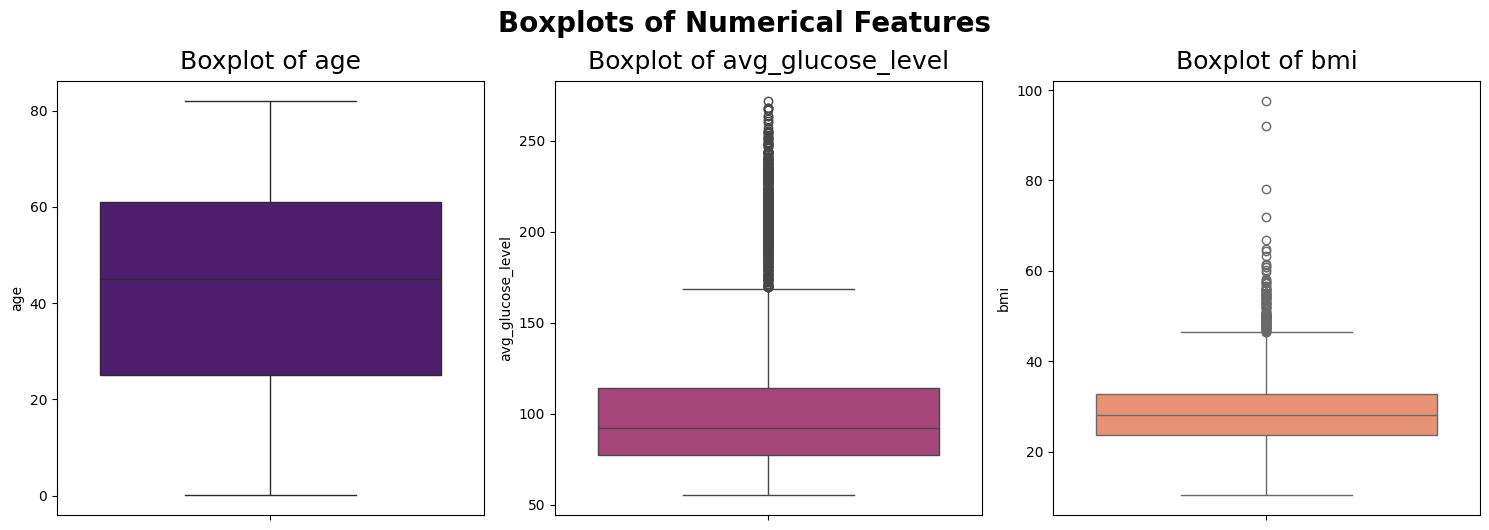

In [ ]:
colors = sns.color_palette("magma", n_colors=3)

plt.figure(figsize=(15, 5))
for i, (col, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=18, y=1.01)

plt.tight_layout()
plt.suptitle("Boxplots of Numerical Features", fontsize=20, y=1.05, weight="bold")
plt.show()

**Interpretation:** 

- Age feature does not have extreme outliers, 

- BMI and average glucose level has some way higher values than usual, which could be considerable outliers. 

- BMI >60–70 is possible but extremely rare.

- Avg glucose has extreme high outliers (250+)








Logging average glucose values:

In [ ]:
df["avg_glucose_level_log"] = np.log(df["avg_glucose_level"])

Capping BMI:

In [ ]:
upper_limit_bmi = df["bmi"].quantile(0.99)
df["bmi_capped"] = np.where(df["bmi"] > upper_limit_bmi, upper_limit_bmi, df["bmi"])

In [80]:
df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke', 'age_group', 'avg_glucose_level_log',
       'bmi_capped'],
      dtype='object')

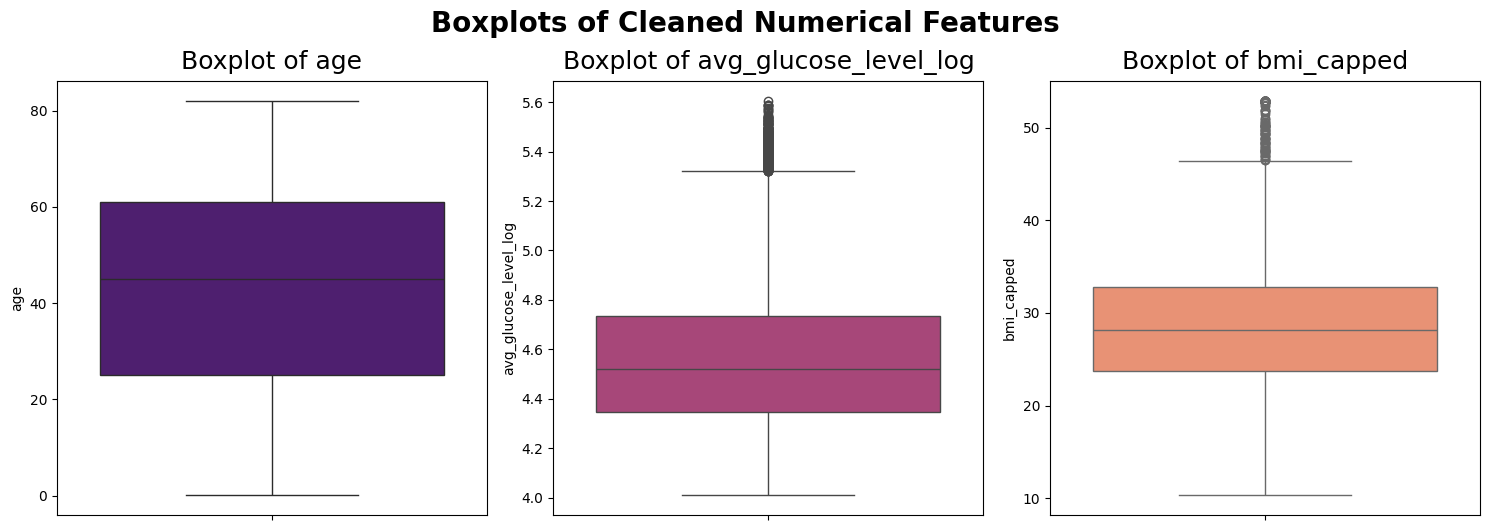

In [ ]:
num_cols = ["age", "avg_glucose_level_log", "bmi_capped"]

colors = sns.color_palette("magma", n_colors=3)

plt.figure(figsize=(15, 5))
for i, (col, color) in enumerate(zip(num_cols, colors), 1):
    plt.subplot(1, 3, i)
    sns.boxplot(y=df[col], color=color)
    plt.title(f"Boxplot of {col}", fontsize=18, y=1.01)

plt.tight_layout()
plt.suptitle(
    "Boxplots of Cleaned Numerical Features", fontsize=20, y=1.05, weight="bold"
)
plt.show()

**Interpretation:** 

- Outliers successfully dealt with. 

- BMI was capped at 99% percentile limit to lower the influence of extreme outliers and preserve interprebility.

- To preserve relative difference avg_glucose values were logged to reduce skewness.

### Cathegorical Encoding Plan

Reviewing cathegorical rows values:

| Variable        | Categories                             |
| --------------- | ---------------------------------------------- |
| gender          | Male, Female, Other                            |
| ever\_married   | Yes, No                                        |
| work\_type      | Private, Govt\_job, Self-employed, etc.        |
| Residence\_type | Urban, Rural                                   |
| smoking\_status | never smoked, formerly smoked, smokes, Unknown |
| age\_group      | Infant, Toddler, Child, Teen, etc.             |


For variables with only 2 categories I will use Binary encoding (0/1):
- ever_married
- residence_type

For variables with 3 categories or more I will use OneHot Encoding. That includes:

- gender
- work_type
- smoking_status
- age_group